# Preprocessing
- Missing Data Handling
    1. imputation
        - numerical - Mean 
        - Categorical (text) - Mode (Most-Frequent)
    2. Removal 
        - Only remove when too much data is missing from a column
        - Remove rows if it is completely empty
        - Remove rows when *dependent values* is missing
- Conversion (Encoding)
    1. Label Encoding 
    2. One Hot Encoding 
- Normalization Of Data (Scaling)
    1. Min-Max Scaling 
    2. Standard Scaling


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset
df = pd.read_csv('C:\\Users\\Navneet\\Documents\\Machine Learning Nov\\Datasets\\automobile.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [5]:
#to view first five
df.head()
#inserting the value inside the bracket will give us the desired number of result 
#For Example : df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
#to view last five Data
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [7]:
#it shows the data of that index location
df.loc[100]

symboling                 0
normalized-losses       106
make                 nissan
fuel-type               gas
aspiration              std
num-of-doors           four
body-style            sedan
drive-wheels            fwd
engine-location       front
wheel-base             97.2
length                173.4
width                  65.2
height                 54.7
curb-weight            2302
engine-type             ohc
num-of-cylinders       four
engine-size             120
fuel-system            2bbl
bore                   3.33
stroke                 3.47
compression-ratio       8.5
horsepower               97
peak-rpm               5200
city-mpg                 27
highway-mpg              34
price                  9549
Name: 100, dtype: object

In [8]:
#first 100 entries
df.loc[:100]
#this aso known as slicing 
#difference between head, tail and loc is that head can show the data from the first value to the give value and tail can show the data from the given value to the last value of the data 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,122,nissan,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7499
97,1,103,nissan,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999
98,2,168,nissan,gas,std,two,hardtop,fwd,front,95.1,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,8249
99,0,106,nissan,gas,std,four,hatchback,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,8949


In [9]:
#this will give the data same as loc but it calculate the data from index value 
df.iloc[:100]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,128,nissan,gas,std,two,hatchback,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7799
96,1,122,nissan,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7499
97,1,103,nissan,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999
98,2,168,nissan,gas,std,two,hardtop,fwd,front,95.1,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,8249


In [10]:
df.columns.to_list()

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [11]:
df['horsepower'] 
#this will give out for those data which contians the data as horsepower

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object

We want to know about columns

In [12]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [13]:
cols = ['curb-weight', 'engine-size']
df[cols]
#this will show only that columns

,curb-weight,engine-size
0,2548,130
1,2548,130
2,2823,152
3,2337,109
4,2824,136
...,...,...
200,2952,141
201,3049,141
202,3012,173
203,3217,145


In [14]:
#shortcut fot the above line of codes
df[['price', 'engine-size', 'horsepower']] 
#The first bar bracket says that what we need from the dataframe 
#The Second bar bracket says that what all is. 

,price,engine-size,horsepower
0,13495,130,111
1,16500,130,111
2,16500,152,154
3,13950,109,102
4,17450,136,115
...,...,...,...
200,16845,141,114
201,19045,141,160
202,21485,173,134
203,22470,145,106


In [15]:
df.iloc[:100, :5]

,symboling,normalized-losses,make,fuel-type,aspiration
0,3,?,alfa-romero,gas,std
1,3,?,alfa-romero,gas,std
2,1,?,alfa-romero,gas,std
3,2,164,audi,gas,std
4,2,164,audi,gas,std
...,...,...,...,...,...
95,1,128,nissan,gas,std
96,1,122,nissan,gas,std
97,1,103,nissan,gas,std
98,2,168,nissan,gas,std


In [16]:
df.loc[:100, ['price','engine-size']]

,price,engine-size
0,13495,130
1,16500,130
2,16500,152
3,13950,109
4,17450,136
...,...,...
96,7499,97
97,7999,97
98,8249,97
99,8949,120


In [17]:
#this will give all the data index
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            195, 196, 197, 198, 199, 200, 201, 202, 203, 204],
           dtype='int64', length=205)

In [18]:
#this will give the data index from last 10 dataframes
df.index[-10:]

Int64Index([195, 196, 197, 198, 199, 200, 201, 202, 203, 204], dtype='int64')

In [19]:
#if we have to remove any data or any column 
#but this will not change any thing in the main data
df.drop(df.index[-10:])

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980
191,0,?,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290


In [20]:
df.drop(df.index[-10:], inplace=True)
#it will remove the data fromthe memory but will not the show the output 
#it should be used after checking the data

Now suppose we want to drop any unused column 

In [21]:
#we will create a valriable for those columns which we have to remove
cols_to_drop = ['symboling', 'normalized-losses', 'fuel-type']

In [22]:
df.drop(cols_to_drop, axis=1)
#By default it is designed to drop the rows but if we want to drop the column we have to use the keyword axis

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,volkswagen,std,two,hatchback,fwd,front,94.5,165.7,64.0,51.4,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980
191,volkswagen,std,four,sedan,fwd,front,100.4,180.2,66.9,55.1,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295
192,volkswagen,turbo,four,sedan,fwd,front,100.4,180.2,66.9,55.1,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,volkswagen,std,four,wagon,fwd,front,100.4,183.1,66.9,55.1,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290


Let's now suppose that we want to make a new column in which we will calculate the average of the vechile

In [23]:
#boolean filter
df[df['price'] == '?']
#As we know that there are '?' value in our data before droping it we have to filter out those values which are not an integer or is '?'. 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [24]:
df.replace('?', np.nan, inplace=True)
#replacing '?' value with numpy nan (Not a Number)

In [25]:
df.isnull().sum()
#Through this we can easily find out how many null values are there in the dataframe 

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [26]:
#Dropna function will remove the value which has NaN or NaT values 
df.dropna(subset=['price'], inplace=True)
#subset keyword will give the instruction to the function the delete on these data. 
df.shape

(191, 26)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 194
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          191 non-null    int64  
 1   normalized-losses  154 non-null    object 
 2   make               191 non-null    object 
 3   fuel-type          191 non-null    object 
 4   aspiration         191 non-null    object 
 5   num-of-doors       189 non-null    object 
 6   body-style         191 non-null    object 
 7   drive-wheels       191 non-null    object 
 8   engine-location    191 non-null    object 
 9   wheel-base         191 non-null    float64
 10  length             191 non-null    float64
 11  width              191 non-null    float64
 12  height             191 non-null    float64
 13  curb-weight        191 non-null    int64  
 14  engine-type        191 non-null    object 
 15  num-of-cylinders   191 non-null    object 
 16  engine-size        191 non

In [28]:
df['price']= df['price'].astype('int')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 194
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          191 non-null    int64  
 1   normalized-losses  154 non-null    object 
 2   make               191 non-null    object 
 3   fuel-type          191 non-null    object 
 4   aspiration         191 non-null    object 
 5   num-of-doors       189 non-null    object 
 6   body-style         191 non-null    object 
 7   drive-wheels       191 non-null    object 
 8   engine-location    191 non-null    object 
 9   wheel-base         191 non-null    float64
 10  length             191 non-null    float64
 11  width              191 non-null    float64
 12  height             191 non-null    float64
 13  curb-weight        191 non-null    int64  
 14  engine-type        191 non-null    object 
 15  num-of-cylinders   191 non-null    object 
 16  engine-size        191 non

In [30]:
#To generate new column and calculate the average
df['average'] = df['price'] / df['city-mpg']

In [31]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,average
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,642.619048
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,785.714286
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,868.421053
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,581.250000
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,969.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,mpfi,3.19,3.40,8.5,90,5500,24,29,9980,415.833333
191,0,NaN,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,mpfi,3.19,3.40,8.5,110,5500,19,24,13295,699.736842
192,0,NaN,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,idi,3.01,3.40,23.0,68,4500,33,38,13845,419.545455
193,0,NaN,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,mpfi,3.19,3.40,9.0,88,5500,25,31,12290,491.600000


<AxesSubplot: >

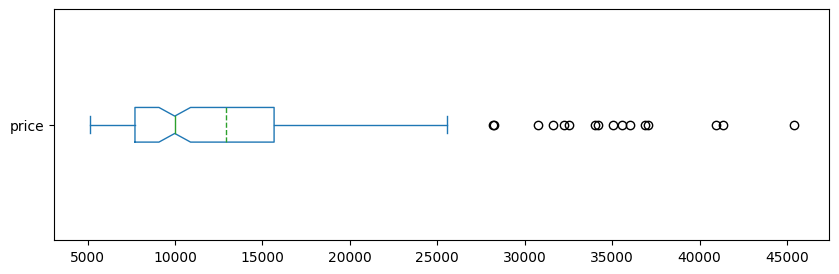

In [32]:
df['price'].plot(kind='box', figsize=(10, 3), meanline = True, showmeans = True, notch = True, vert = False)
#kind = kind of plot 
#meanline = calculate the mean 
#showmeans = shows the mean line as shown with dashed line 
#notch = will highlight the meadian point as shown in the plot with curved area

In the above graph the min value is around 5000 max value is around 25000 and after 25000 the dotted portion are called outlieres. That measn they are exceptional values

In [33]:
df['price'].describe()

count      191.000000
mean     12926.062827
std       8028.532208
min       5118.000000
25%       7713.500000
50%       9988.000000
75%      15667.500000
max      45400.000000
Name: price, dtype: float64

In [34]:
df['horsepower'] = df['horsepower'].astype('float')

<AxesSubplot: >

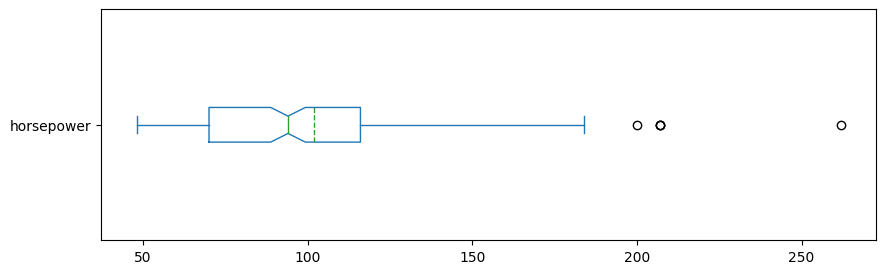

In [35]:
df['horsepower'].plot(kind='box', figsize=(10, 3), meanline = True, showmeans = True, notch = True, vert = False)

Now let's suppose we want to want to add a new column in which we want to store the milage of the vechile 

In [36]:
#We are making a function to give a logic
def milage_bin(val):
    if val < 20:
        return "Low Milage"
    elif val < 35: 
        return "Medium Milage"
    else: 
        return "High Milage"

In [37]:
#Now here we will make a new column and apply to our city-mpg column our funtion/logic here
df['milage_bin_group'] = df['city-mpg'].apply(milage_bin)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,average,milage_bin_group
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000,21,27,13495,642.619048,Medium Milage
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000,21,27,16500,785.714286,Medium Milage
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000,19,26,16500,868.421053,Low Milage
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500,24,30,13950,581.250000,Medium Milage
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500,18,22,17450,969.444444,Low Milage
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110.0,5500,19,25,15250,802.631579,Low Milage
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,3.19,3.40,8.5,110.0,5500,19,25,17710,932.105263,Low Milage
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,3.19,3.40,8.5,110.0,5500,19,25,18920,995.789474,Low Milage
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.13,3.40,8.3,140.0,5500,17,20,23875,1404.411765,Low Milage
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,3.50,2.80,8.8,101.0,5800,23,29,16430,714.347826,Medium Milage
